<a href="https://colab.research.google.com/github/jjeongab/colab_research/blob/main/fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt    

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
df = pd.read_csv('/content/MaunaLoaDailyTemps.csv')

In [ ]:
df.dropna(inplace=True)
df.reset_index(drop = True, inplace = True)

In [ ]:
 df = df[["DATE", "AvgTemp"]]

In [ ]:
df.columns = ['ds', 'y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

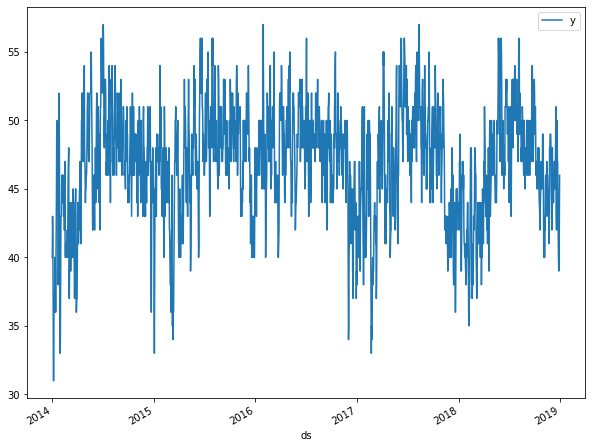

In [ ]:
df.plot(x ='ds', y ='y', figsize=(10, 8))

In [ ]:
train = df.iloc[:len(df) -365]

In [ ]:
test = df.iloc[len(df)-365:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdgcccnd3/hehbdkke.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdgcccnd3/clmndvqp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22617', 'data', 'file=/tmp/tmpdgcccnd3/hehbdkke.json', 'init=/tmp/tmpdgcccnd3/clmndvqp.json', 'output', 'file=/tmp/tmpdgcccnd3/prophet_modelpd9wbxnv/prophet_model-20230212065946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:59:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:59:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

# Evaluate Your Model

In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from statsmodels.tools.eval_measures import rmse

In [36]:
prediction =  forecast.iloc[-365:]['yhat']

In [39]:
print("Root Mean Squared Error between actual and predicted values: ", rmse(prediction, test['y']))

Root Mean Squared Error between actual and predicted values:  3.4600855440122014


In [40]:
print("Mean value of Test Dataset: ", test['y'].mean())

Mean value of Test Dataset:  46.3041095890411
